In [1]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

In [2]:
faces.data[0:5, :]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.1983471 , 0.19421488, 0.19421488, ..., 0.75206614, 0.75206614,
        0.73966944],
       [0.5       , 0.54545456, 0.58264464, ..., 0.17768595, 0.17355372,
        0.17355372]], dtype=float32)

In [3]:
faces.target[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 30))
# plot several images
for i in range(30):
    ax = fig.add_subplot(10, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [6]:
# 4096 dimensions is a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset.

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

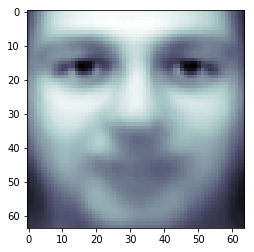

In [8]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)


In [9]:
print(pca.components_.shape)    # as many principal components as original dimensions

(150, 4096)


In [10]:
# How the some variants of faces look compared to the mean face  (sample of 30 principal components)

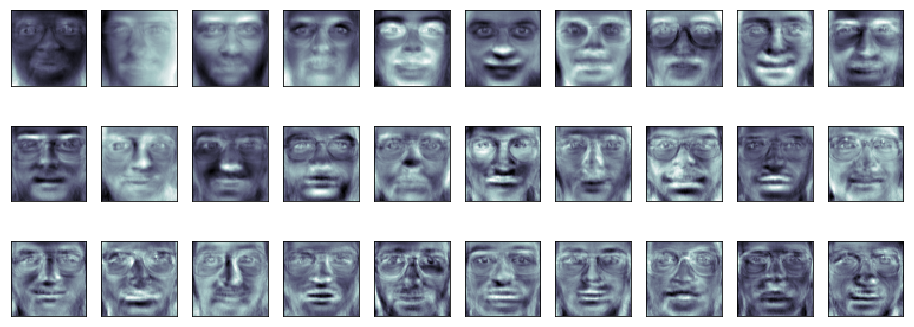

In [11]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [12]:
# The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. 
# We see that the first few components seem to primarily take care of lighting conditions; 
# the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

In [13]:
# project original data into PCA dimensions



X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)



(300, 150)
(100, 150)


In [14]:
# Modelling using SVM


from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)



SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

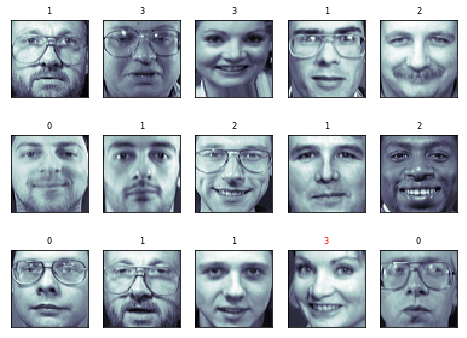

In [15]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)
